# Практикум 2 

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Задача 2.
Приложете пространствената операция негатив върху полутоново изображение.
Използвайте като входно изображението gray.jpg. Приложете същата операция и
върху резултата от изравняването на хистограмата на gray.jpg.


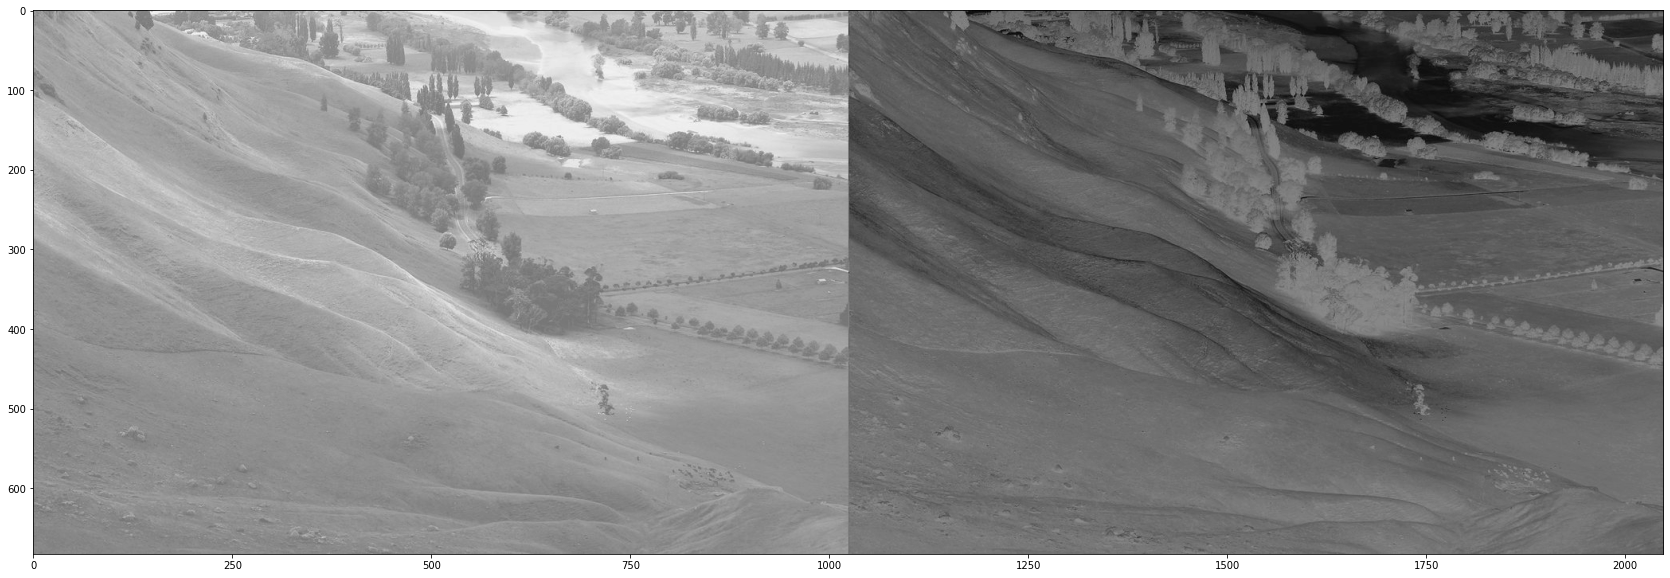

In [2]:
gray = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)

gray_negative = 255 - gray

plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((gray, gray_negative), axis=1), 'gray')

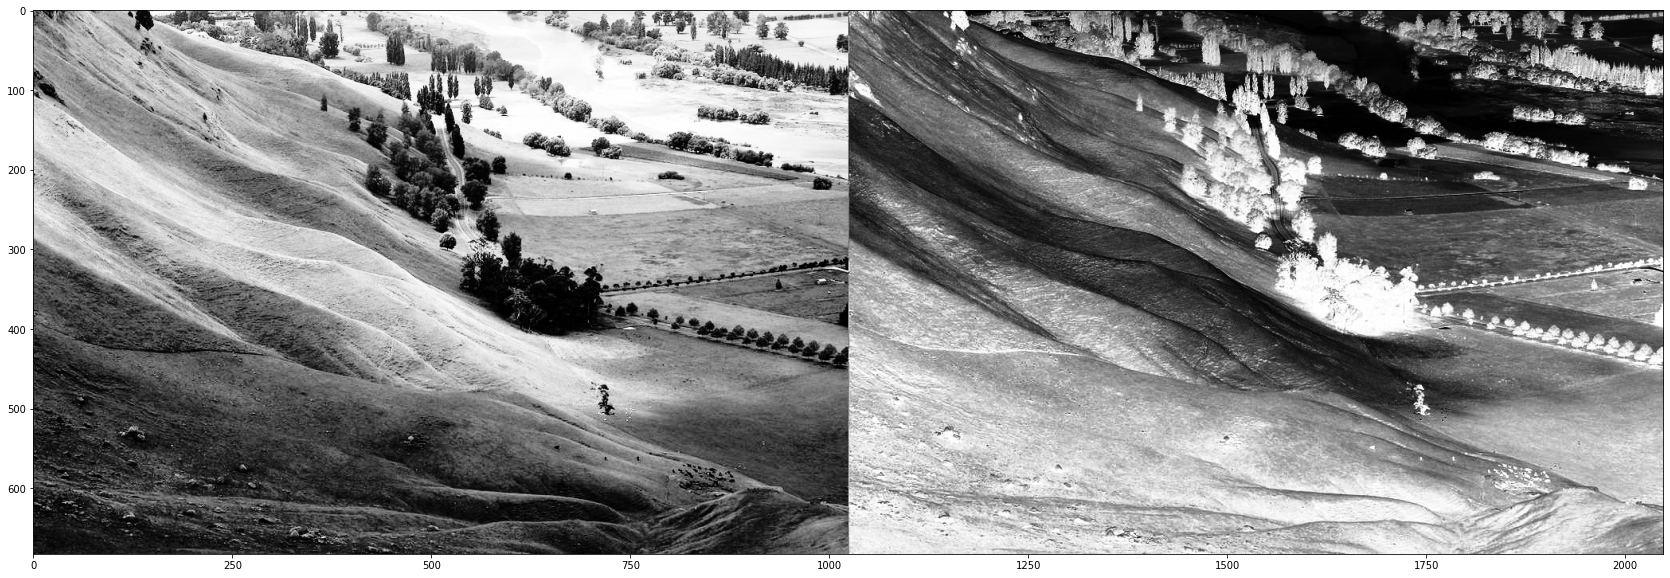

In [3]:
gray_equalized = cv2.imread('gray_equalized.jpg', cv2.IMREAD_GRAYSCALE)

gray_equalized_negative = 255 - gray_equalized

plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((gray_equalized, gray_equalized_negative), axis=1), 'gray')

### Задача 3.
Приложете гама корекция върху gray.jpg с изравнена хистограма.

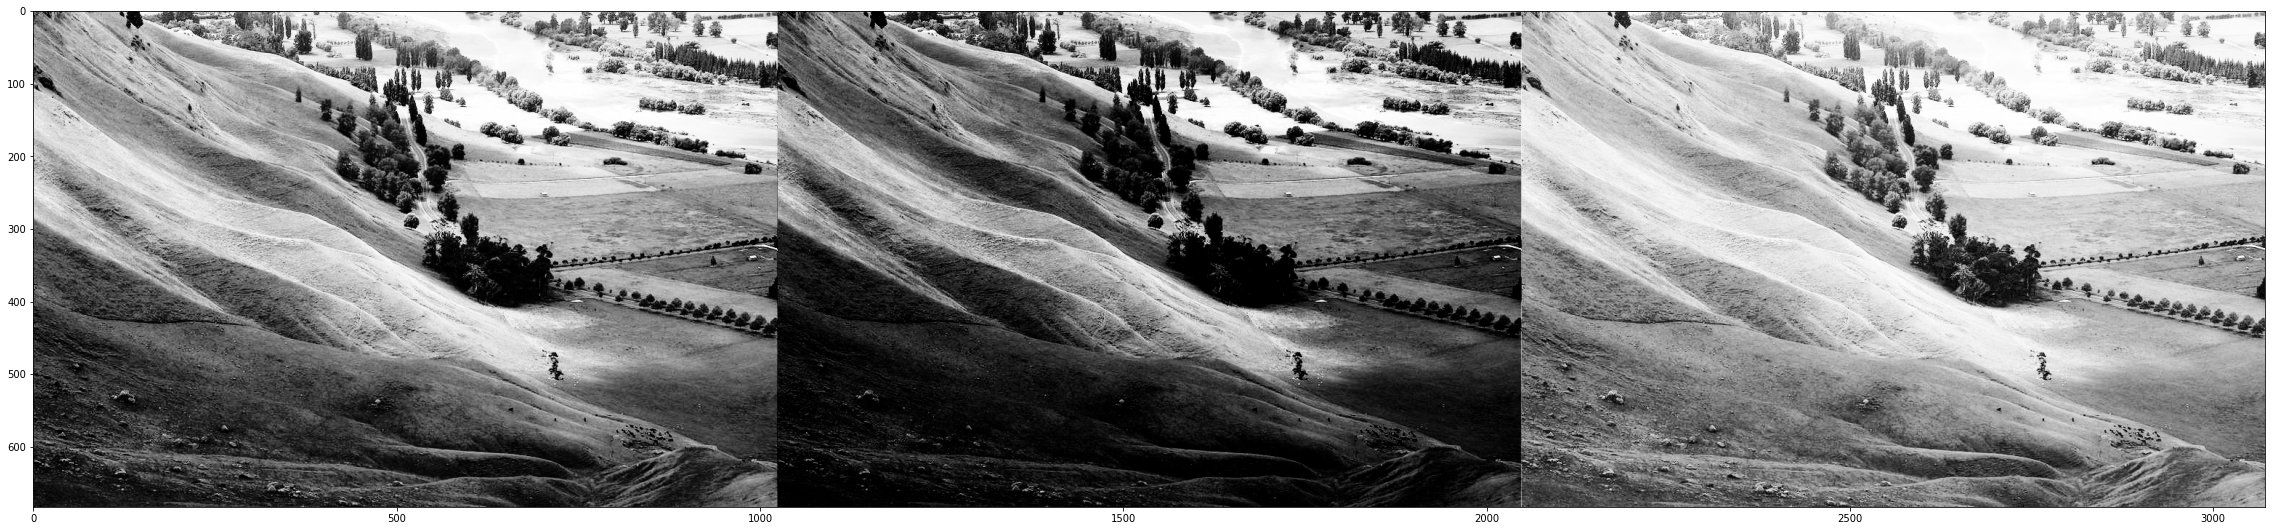

In [4]:
gray_equalized = cv2.imread('gray_equalized.jpg', cv2.IMREAD_GRAYSCALE)

# apply gamma correction by using numpy matrix operations
# Note: do not forget to cast result to 8-bit unsigned int
gamma_2 = (255.0 * np.power(gray_equalized / 255.0, 2)).astype(np.uint8)
gamma_0_5 = (255.0 * np.power(gray_equalized / 255.0, 0.5)).astype(np.uint8)

plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((gray_equalized, gamma_2, gamma_0_5), axis=1), 'gray')

### Задача 4.
Приложете операцията Contrast Stretching върху gray.jpg. Сравнете резултата с този от
изравняването на хистограмата. Сравнете хистограмата на gray.jpg с тази след
прилагането на Contrast Stretching операцията. 

In [5]:
gray = cv2.imread('gray.jpg', cv2.IMREAD_GRAYSCALE)
gray_equalized = cv2.imread('gray_equalized.jpg', cv2.IMREAD_GRAYSCALE)

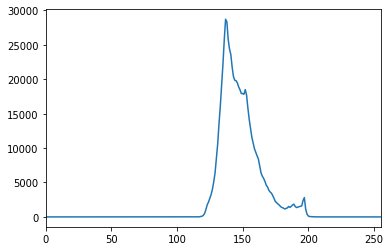

In [6]:
histogram, bins = np.histogram(gray, bins=range(257))
plt.figure('histogram')
plt.xlim((0, 255))
plt.plot(histogram)

In [7]:
# apply contrast stretching by using numpy matrix operations
# Note: do not forget to cast result to 8-bit unsigned int
a = 0   # min intensity
b = 255 # max intensity
c = 115 # lower strech bound
d = 190 # upper strech bound
gray_contrast_stretched = (gray.astype(np.double) - c) * (b - a) / (d - c) + a
gray_contrast_stretched[gray_contrast_stretched < a] = a
gray_contrast_stretched[gray_contrast_stretched > b] = b
gray_contrast_stretched = gray_contrast_stretched.astype(np.uint8)

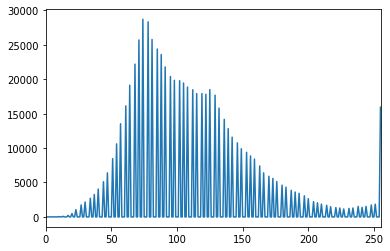

In [8]:
# compute and display streched histogram
stretched_histogram, bins = np.histogram(gray_contrast_stretched, bins=range(257))
plt.figure('stretched histogram')
plt.xlim((0, 255))
plt.plot(stretched_histogram)
plt.show()

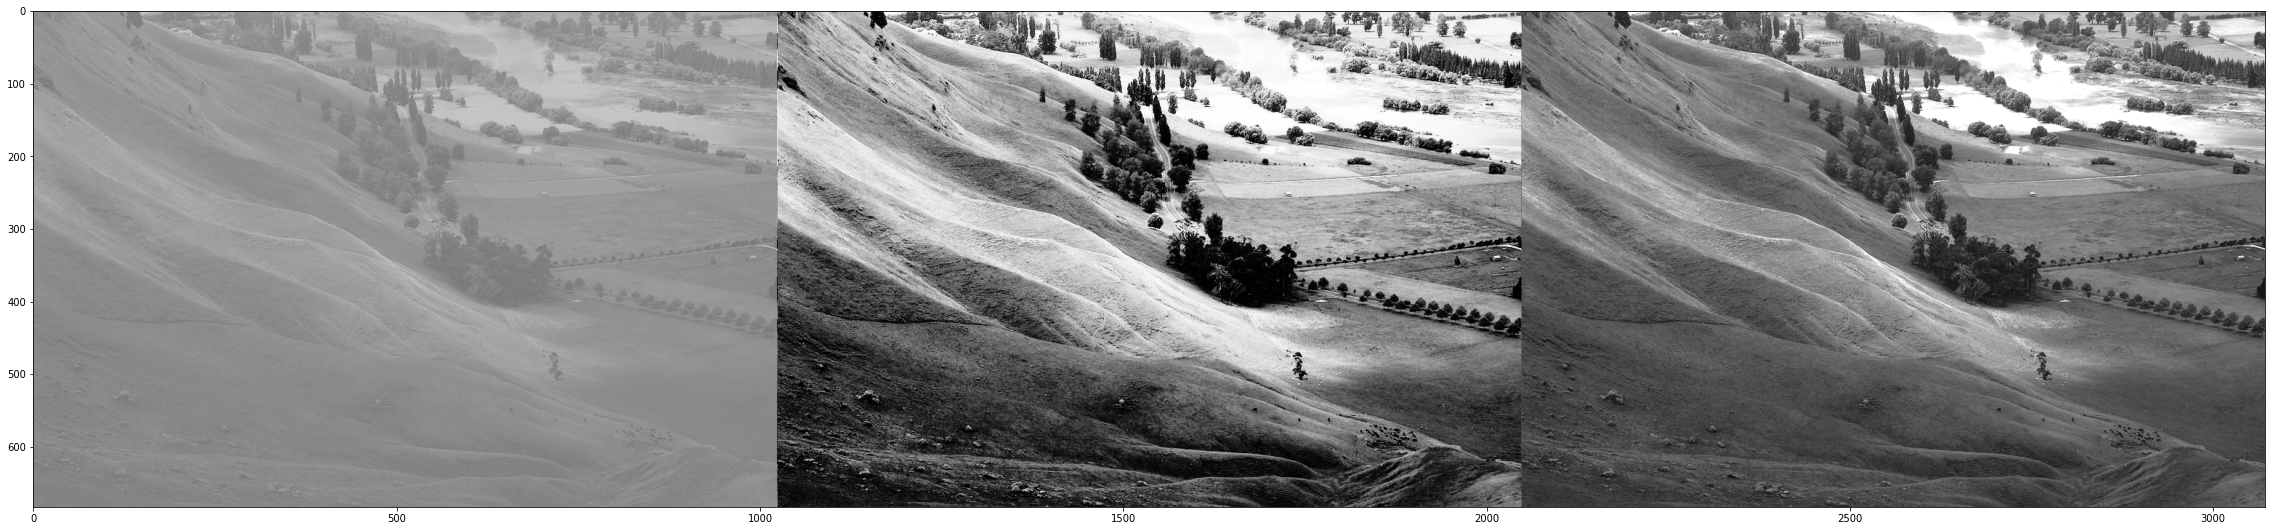

In [9]:
plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((gray, gray_equalized, gray_contrast_stretched), axis=1), 'gray')

### Задача 5.
Генерирайте матрица с размерност 5x5 със случайни цели числа между 0 и 10.
Приложете конволюция върху нея с плъзгащ прозорец 3х3.


In [10]:
# generate random matrix 5x5
mat = np.random.randint(11, size=(5, 5))

# define 3x3 mask 
mask = np.array([[0, 0, 0], [0, 2, 1], [0, 0, 0]])
mask = mask / np.sum(mask)

# user defined convolution
# Note: Python 3 integer division operator //
def convolve(input, matrix):
    inputW = input.shape[0]
    inputH = input.shape[1]

    matrixW = matrix.shape[0]
    matrixH = matrix.shape[1]

    output = np.zeros(input.shape, np.uint8)

    for i in range(inputW):
        for j in range(inputH):
            sum = np.zeros(1, np.double)
            
            for k in range(matrixW):
                for l in range(matrixH):
                    if i + k - matrixW // 2 < 0 or i + k - matrixW // 2 >= inputW:
                        continue
                    if j + l - matrixH // 2 < 0 or j + l - matrixH // 2 >= inputH:
                        continue

                    sum += input[i + k - matrixW // 2, j + l - matrixH // 2] * matrix[k, l]
    
            output[i, j] = int(sum)

    return output


# apply convolution
output = convolve(mat, mask)

In [11]:
print(mask)

[[0.         0.         0.        ]
 [0.         0.66666667 0.33333333]
 [0.         0.         0.        ]]


In [12]:
print(mat)

[[ 2  2  7  9  6]
 [ 6  3  3  8  3]
 [ 2  6  3  9  1]
 [10  8  1 10  7]
 [ 1  9  2  4  7]]


In [13]:
print(output)

[[2 3 7 8 4]
 [5 3 4 6 2]
 [3 5 5 6 0]
 [9 5 3 9 4]
 [3 6 2 5 4]]


### Задача 6.
Приложете заглаждащ линеен филтър с размерност 3х3 и 5х5 върху noisy_cube.jpg.
Сравнете получените резултати.

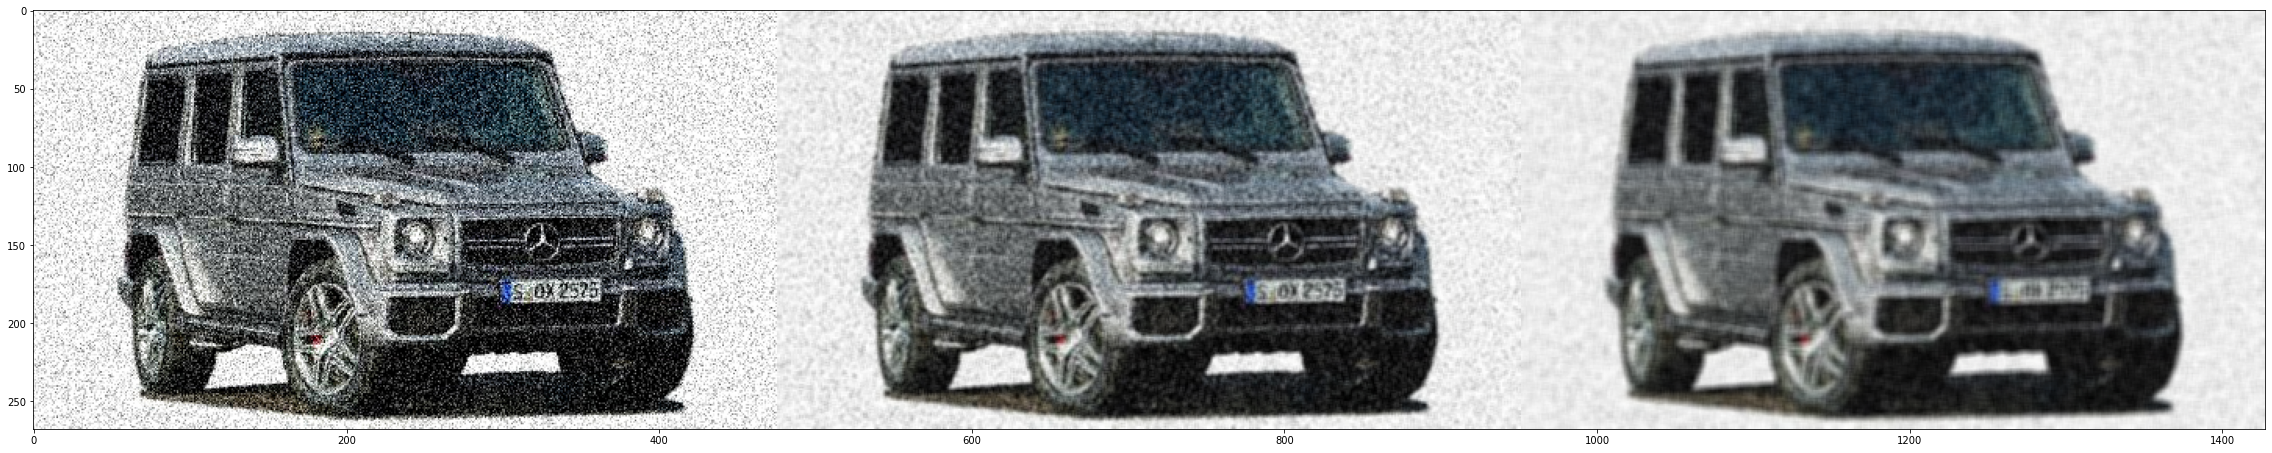

In [14]:
mask_3 = np.ones((3, 3)) / 9
mask_5 = np.ones((5, 5)) / 25

input = cv2.imread('noisy_cube.jpg', cv2.IMREAD_COLOR)
input_RGB = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

# apply OpenCV filter2D function
output_3 = cv2.filter2D(input_RGB, -1, mask_3)

# apply 5x5 mask
output_5 = cv2.filter2D(input_RGB, -1, mask_5)

plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((input_RGB, output_3, output_5), axis=1), 'gray')

### Задача 7.
Приложете гаусов филтър с плъзгащ прозорец 3х3 и 5х5 върху photo.jpg. Приложете го
няколко пъти последователно. Сравнете получените резултати.

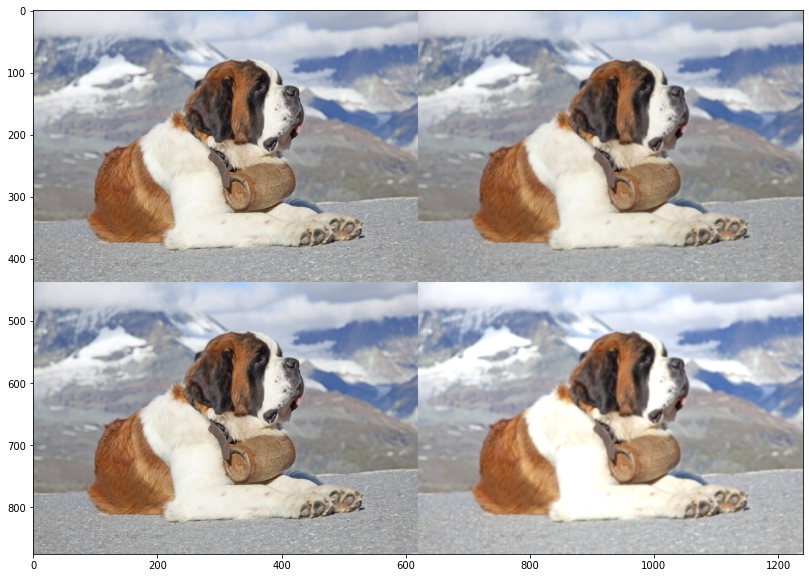

In [15]:
# define filter matrix
gaus_3 = (1.0 / 16.0) * np.array([[1, 2, 1],
                                  [2, 4, 2],
                                  [1, 2, 1]])
gaus_5 = (1.0 / 243.0) * np.array([[1, 4, 7, 4, 1],
                                  [4, 16, 26, 16, 4],
                                  [7, 26, 41, 26, 7],
                                  [4, 16, 26, 16, 4],
                                  [1, 4, 7, 4, 1]])

input = cv2.imread('photo.jpg', cv2.IMREAD_COLOR)
input_RGB = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

# apply OpenCV filter2D function
output_3 = cv2.filter2D(input_RGB, -1, gaus_3)
output_5 = cv2.filter2D(input_RGB, -1, gaus_5)

plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((np.concatenate((input_RGB, output_3), axis=1),
                           np.concatenate((input_RGB, output_5), axis=1)), axis=0), 'gray')

### Задача 8.
Приложете 5x5 гаусов и 5x5 медианен филтър върху median.jpeg. Сравнете
получените резултати.

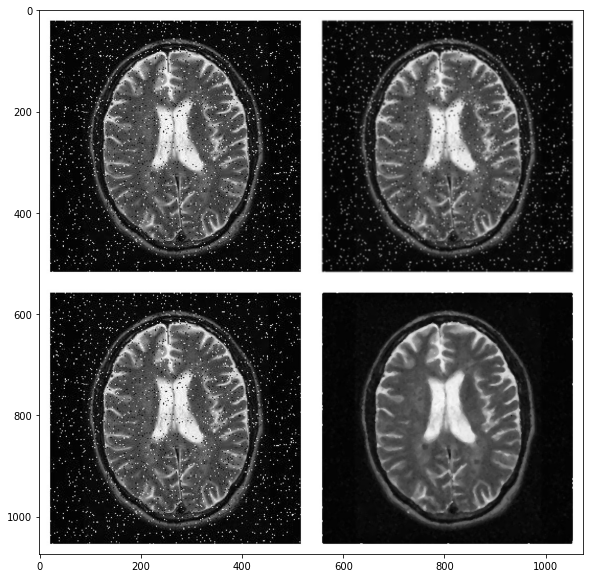

In [16]:
# read input image
input = cv2.imread('median.jpeg', cv2.IMREAD_COLOR)
input_RGB = cv2.cvtColor(input, cv2.COLOR_BGR2RGB)

# apply OpenCV Gaussian and Median Blur filters wit aperture 5x5
gauss = cv2.GaussianBlur(input_RGB, (5, 5), 0)
median = cv2.medianBlur(input_RGB, 5)

plt.figure(figsize=(40,10))
plt.imshow(np.concatenate((np.concatenate((input_RGB, gauss), axis=1),
                           np.concatenate((input_RGB, median), axis=1)), axis=0), 'gray')